In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
training_set = pd.read_csv("../data/datasets/visits_sp_unique_train_positivo_1000_random_0.csv")

In [4]:
testing_set = pd.read_csv("../data/datasets/visits_sp_unique_test_positivo_1000_random_0.csv")

In [5]:
testing_set_with_change = pd.read_csv("../data/datasets/visits_sp_changed_test_positivo_1000_random_0.csv")

In [6]:
c = ["T2D","AGE", "mo_t2d", "fa_t2d", "sex"]

In [11]:
# Count

In [12]:
full_set = pd.concat([training_set, testing_set])

In [14]:
len(full_set)

2342

In [13]:
full_set[["T2D","AGE"]].groupby(["T2D"]).describe()

AGE                                                    
      count       mean        std   min   25%   50%   75%   max
T2D                                                            
0    1781.0  40.434026  16.279399  15.0  27.0  39.0  51.0  97.0
1     561.0  53.376114  13.949503  18.0  44.0  53.0  63.0  92.0

In [15]:
561/2342

0.23953885567890693

In [19]:
tmp = pd.concat([
    full_set[["T2D","AGE"]].groupby(["T2D"]).describe(), 
    training_set[["T2D","AGE"]].groupby(["T2D"]).describe(),
    testing_set[["T2D","AGE"]].groupby(["T2D"]).describe(),
    testing_set_with_change[["T2D","AGE"]].groupby("T2D").describe()
])

In [7]:
# Age

In [19]:
training_set[["T2D","AGE"]].groupby(["T2D"]).describe()

AGE                                                    
      count       mean        std   min   25%   50%   75%   max
T2D                                                            
0    1387.0  38.344629  16.554978  15.0  24.0  36.0  49.0  97.0
1     405.0  55.229630  14.100035  18.0  46.0  54.0  66.0  92.0

In [7]:
testing_set[["T2D","AGE"]].groupby(["T2D"]).describe()

AGE                                                     
     count       mean        std   min   25%   50%    75%   max
T2D                                                            
0    394.0  47.789340  12.811564  28.0  37.0  45.0  58.00  86.0
1    156.0  48.564103  12.351403  20.0  40.0  50.0  56.25  85.0

In [20]:
testing_set_with_change[["T2D","AGE"]].groupby("T2D").describe() # TODO melhorar a seleçao para produzir a estatistica
# ha 103 ids multiplas visitas...usar uma func similar a utilizada no report para selecionar o primeiro positivo

AGE                                                    
     count      mean        std   min   25%   50%    75%   max
T2D                                                           
0    200.0  43.49000  13.260433  16.0  33.0  44.0  51.25  81.0
1    212.0  51.54717  13.063557  23.0  42.0  52.0  61.00  85.0

In [9]:
len(testing_set_with_change['id'].groupby("id").describe()

103

In [34]:
testing_set_with_change['id'].value_counts().max()

4

In [16]:
testing_set_with_change # select 

,Unnamed: 0,id,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,...,snp_1_143276644,snp_16_9536673,snp_20_25734788,AGE,T2D,sex,mo,fa,mo_t2d,fa_t2d
0,0,A02267,0,0,0,0,0,1,0,0,...,1,0,0,47,0,F,A02254,A20031,0.0,2.0
1,1,A02267,0,0,0,0,0,1,0,0,...,1,0,0,52,1,F,A02254,A20031,0.0,2.0
2,2,A02267,0,0,0,0,0,1,0,0,...,1,0,0,57,1,F,A02254,A20031,0.0,2.0
3,3,A02267,0,0,0,0,0,1,0,0,...,1,0,0,63,1,F,A02254,A20031,0.0,2.0
4,4,A21076,0,0,1,0,0,0,0,1,...,0,0,0,35,0,F,A02287,A21055,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,407,A32122,0,0,0,0,0,1,0,0,...,0,0,0,53,1,F,A32013,A32099,1.0,1.0
408,408,A03376,0,0,1,0,0,1,0,0,...,1,0,0,32,0,F,A03253,A03374,1.0,1.0
409,409,A03376,0,0,1,0,0,1,0,0,...,1,0,0,38,1,F,A03253,A03374,1.0,1.0
410,410,A03376,0,0,1,0,0,1,0,0,...,1,0,0,43,1,F,A03253,A03374,1.0,1.0


In [118]:
def plot_f():
    ages = np.arange(20,80, 5)
    def r(x):
        tmp = full_set[(full_set.AGE >= x) & (full_set.AGE < x + 5)]
        c = tmp.groupby(["T2D"]).count().id[0]+tmp.groupby(["T2D"]).count().id[1]
        r = tmp.groupby(["T2D"]).count().id[1]/c
        return np.array([r, c])
    a = np.array([r(x) for x in ages])
    ax0 = plt.subplot(2,1,1)
    ax0.plot(ages, a[:,0])
    ax1 = plt.subplot(2,1,2)
    ax1.bar(ages, a[:,1])
#     return a


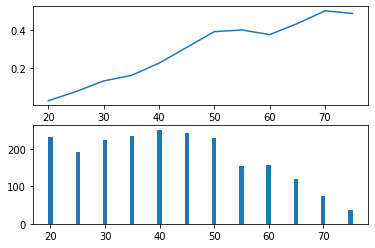

In [119]:
plot_f()

In [ ]:
# Sex

In [21]:
training_set[["T2D","sex"]].groupby(["T2D"]).describe()

sex                
    count unique top freq
T2D                      
0    1387      3   F  767
1     405      2   F  241

In [12]:
testing_set[["T2D","sex"]].groupby(["T2D"]).describe()

sex                
    count unique top freq
T2D                      
0     394      2   F  267
1     156      2   F   89

In [13]:
testing_set_with_change[["T2D","sex"]].groupby(["T2D"]).describe()

sex                
    count unique top freq
T2D                      
0     200      2   F  103
1     212      2   F  109

In [16]:
# there is one patient that sex are not M or F, but is '0' for this case the training will ignore the sex feature setting it as [0,0] instead of [2,0] or [0,2]
training_set[training_set["sex"]=='0']

,Unnamed: 0,id,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,...,snp_1_143276644,snp_16_9536673,snp_20_25734788,AGE,T2D,sex,mo,fa,mo_t2d,fa_t2d
44,44,813178,0,0,0,0,0,0,0,1,...,0,0,0,30,0,0,0,0,2.0,2.0


In [35]:
training_set[['id', "T2D", "mo_t2d", "fa_t2d"]].groupby(["T2D",  "mo_t2d", "fa_t2d"]).count()/len(training_set)

id
T2D mo_t2d fa_t2d          
0   0.0    0.0     0.086496
           1.0     0.047991
           2.0     0.186384
    1.0    0.0     0.044085
           1.0     0.054688
           2.0     0.095424
    2.0    0.0     0.029576
           1.0     0.014509
           2.0     0.214844
1   0.0    0.0     0.003348
           1.0     0.004464
           2.0     0.012835
    1.0    0.0     0.016741
           1.0     0.026786
           2.0     0.033482
    2.0    0.0     0.004464
           1.0     0.005022
           2.0     0.118862

In [96]:
vtrain = training_set[['id', "T2D", "mo_t2d", "fa_t2d"]].groupby(["T2D",  "mo_t2d", "fa_t2d"]).count()/len(training_set)
vtrain = np.split(vtrain.values.flatten(), 2)
vtrain = np.array([np.split(v_t2d,3) for v_t2d in vtrain])

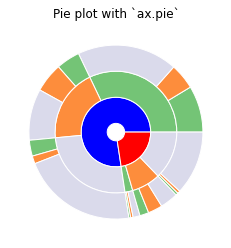

In [97]:
plot(vtrain)

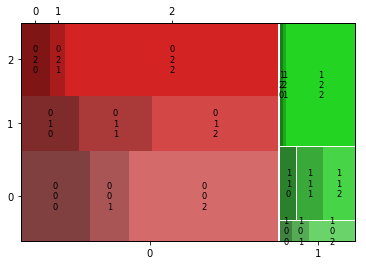

In [107]:
mosaic(vtrain);

In [34]:
testing_set[['id', "T2D", "mo_t2d", "fa_t2d"]].groupby(["T2D",  "mo_t2d", "fa_t2d"]).count()/len(testing_set)

id
T2D mo_t2d fa_t2d          
0   0.0    0.0     0.107273
           1.0     0.070909
           2.0     0.160000
    1.0    0.0     0.038182
           1.0     0.074545
           2.0     0.063636
    2.0    0.0     0.007273
           1.0     0.010909
           2.0     0.183636
1   0.0    0.0     0.012727
           1.0     0.012727
           2.0     0.036364
    1.0    0.0     0.012727
           1.0     0.034545
           2.0     0.036364
    2.0    0.0     0.007273
           1.0     0.014545
           2.0     0.116364

In [93]:
vtest = testing_set[['id', "T2D", "mo_t2d", "fa_t2d"]].groupby(["T2D",  "mo_t2d", "fa_t2d"]).count()/len(testing_set)
vtest = np.split(vtest.values.flatten(), 2)
vtest = np.array([np.split(v_t2d,3) for v_t2d in vtest])

<ipython-input-90-dfc32f84d5c8>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(vals.sum(axis=2).flatten(), radius=1-size, colors=outer_colors,


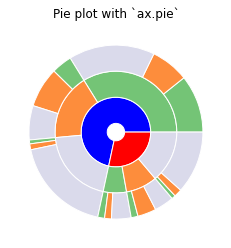

In [94]:
plot(vtest)

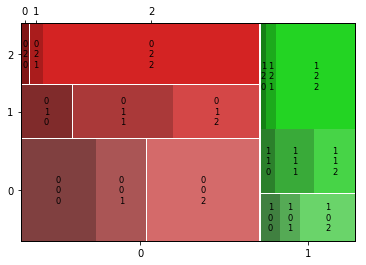

In [105]:
mosaic(vtest);

In [53]:
testing_set_with_change[['id', "T2D", "mo_t2d", "fa_t2d"]].groupby(["T2D",  "mo_t2d", "fa_t2d"]).count()/len(testing_set_with_change)

id
T2D mo_t2d fa_t2d          
0   0.0    0.0     0.026699
           1.0     0.033981
           2.0     0.063107
    1.0    0.0     0.031553
           1.0     0.067961
           2.0     0.065534
    2.0    0.0     0.007282
           1.0     0.019417
           2.0     0.169903
1   0.0    0.0     0.021845
           1.0     0.024272
           2.0     0.063107
    1.0    0.0     0.026699
           1.0     0.077670
           2.0     0.080097
    2.0    0.0     0.012136
           1.0     0.029126
           2.0     0.179612

In [61]:
v = testing_set_with_change[['id', "T2D", "mo_t2d", "fa_t2d"]].groupby(["T2D",  "mo_t2d", "fa_t2d"]).count()/len(testing_set_with_change)
v = np.split(v.values.flatten(), 2)
v = np.array([np.split(v_t2d,3) for v_t2d in v])

<ipython-input-90-dfc32f84d5c8>:15: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(vals.sum(axis=2).flatten(), radius=1-size, colors=outer_colors,


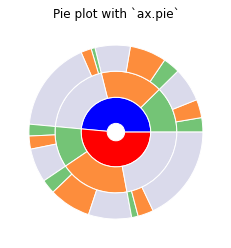

In [90]:
def plot(v):
    fig, ax = plt.subplots()

    size = 0.3
    # vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
    vals = v

    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap([9,5,15])
    inner_colors = cmap([1, 5])

    ax.pie(vals.sum(axis=2).sum(axis=1), radius=1-2*size, colors=["b", "r"],
        wedgeprops=dict(width=size, edgecolor='w'))

    ax.pie(vals.sum(axis=2).flatten(), radius=1-size, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'))

    ax.pie(vals.flatten(), radius=1, colors=outer_colors,
        wedgeprops=dict(width=size, edgecolor='w'))

    ax.set(aspect="equal", title='Pie plot with `ax.pie`')
    plt.show()
plot(v)

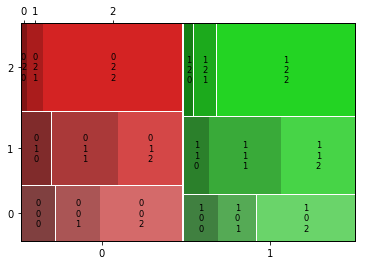

In [103]:
mosaic(v);

In [6]:
testing_set_with_change

,Unnamed: 0,id,snp_8_133462953,snp_2_91635413,snp_9_25963828,snp_1_17764169,snp_12_41767967,snp_4_49530811,snp_2_96519717,snp_7_116910447,...,snp_1_143276644,snp_16_9536673,snp_20_25734788,AGE,T2D,sex,mo,fa,mo_t2d,fa_t2d
0,0,A02267,0,0,0,0,0,1,0,0,...,1,0,0,47,0,F,A02254,A20031,0.0,2.0
1,1,A02267,0,0,0,0,0,1,0,0,...,1,0,0,52,1,F,A02254,A20031,0.0,2.0
2,2,A02267,0,0,0,0,0,1,0,0,...,1,0,0,57,1,F,A02254,A20031,0.0,2.0
3,3,A02267,0,0,0,0,0,1,0,0,...,1,0,0,63,1,F,A02254,A20031,0.0,2.0
4,4,A21076,0,0,1,0,0,0,0,1,...,0,0,0,35,0,F,A02287,A21055,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,407,A32122,0,0,0,0,0,1,0,0,...,0,0,0,53,1,F,A32013,A32099,1.0,1.0
408,408,A03376,0,0,1,0,0,1,0,0,...,1,0,0,32,0,F,A03253,A03374,1.0,1.0
409,409,A03376,0,0,1,0,0,1,0,0,...,1,0,0,38,1,F,A03253,A03374,1.0,1.0
410,410,A03376,0,0,1,0,0,1,0,0,...,1,0,0,43,1,F,A03253,A03374,1.0,1.0
